0.9320537183102141


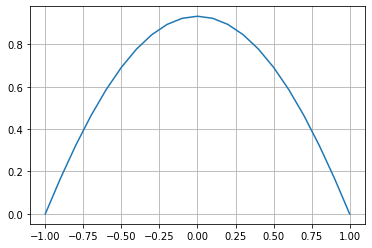

CPU times: user 12 s, sys: 161 ms, total: 12.1 s
Wall time: 11.8 s


In [13]:
%%time

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from functools import reduce


def define_base_system(n):
    def generate_function(power):
        def f(x):
            return x ** power * (1 - x ** 2)
        return f

    return [generate_function(i) for i in range(n)]


def define_derivative2_base_system(n):
    def generate_function(power):
        if (power == 0):
            return lambda x: -2
        elif (power == 1):
            return lambda x: -6 * x
        else:
            return lambda x: power * (power - 1) * x ** (power - 2) - (power + 2) * (power + 1) * x ** power

    return [generate_function(i) for i in range(n)]


def mul_integral(functions, x1, x2):
    def func(x):
        res = 0
        for funs in functions:
            res += reduce(lambda prev, next: prev * next, [f(x) for f in funs])
        return res

    result = quad(func, x1, x2)[0]
    return result


def mix_functions(first_functions_group, second_functions_group):
    result = []
    for first_functions in first_functions_group:
        for second_functions in second_functions_group:
            result.append(first_functions + second_functions)

    return result


def integral_mnk(func_coeff, base_system, derivative2_base_system, borders):
    x1, x2 = borders
    n = len(base_system)
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    for i in range(n):
        differential_functions = (
            (func_coeff[0], derivative2_base_system[i]),
            (func_coeff[2], base_system[i]),
        )
        for j in range(n):
            coefficients_functions = (
                (func_coeff[0], derivative2_base_system[j]),
                (func_coeff[2], base_system[j]),
            )
            A[i][j] = mul_integral(mix_functions(coefficients_functions, differential_functions), x1, x2)

        b[i] = mul_integral(mix_functions(((func_coeff[3],),), differential_functions), x1, x2)
    return np.linalg.solve(A, b)


def r(x):
    return 1


def p(x):
    return 0


def q(x):
    return 1 + x ** 2


def f(x):
    return -1


n = 100
xa, xb = -1, 1
func_coeff = (r, p, q, f)
base_system = define_base_system(n)
derivative2_base_system = define_derivative2_base_system(n)
coeff = integral_mnk(func_coeff, base_system, derivative2_base_system, (xa, xb))

h = 0.1
x_vector = np.arange(xa, xb + h, h)
y_vector = np.array([reduce(
                        lambda prev_el, next_el: prev_el + next_el[0] * next_el[1](x),
                        zip(coeff, base_system),
                        0,
                     ) for x in x_vector])
print(max(y_vector))
plt.plot(x_vector, y_vector)
plt.grid()
plt.show()